# ML T-Generation Занятие 3: Линейная регрессия.
# Проблема переобучения. Кросс-валидация и регуляризация.

Автор: Гаркавый Андрей (andrewgarkavyy@gmail.com)


## 0. План

1. Приближение одномерной функции многочленом

2. Переобучение

3. Выводы

4. Разделение на тренировочную и тестовую части

5. Кросс-валидация

6. Линейная регрессия

7. Как подбираются коэффициенты

8. Регуляризация

## 1. Приближение одномерной функции многочленом

Начнем с простой задачи.


1) Есть функция $f(x)$, но мы ее не знаем.

2) Зато мы знаем ее значения в $m$ точках (они называются тренировочным множеством):
$$f(x_1) = y_1$$
$$\cdots$$
$$f(x_m) = y_m$$
3) Нужно научиться приблизительно восстанавливать эту функцию.

Самый простой способ - научиться приближать её многочленом, а именно давайте подберем такие коэффициенты $a_0, a_1, \ldots, a_n$, чтобы многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$ был как можно ближе к $f(x)$.

Но что такое "приблизить"? Мы знаем лишь значения в $m$ точках, так что в лучшем случае она должна проходить через все эти точки (хотя скоро мы увидим, что это не так).

В этом случае обычно пытаются минимизировать сумму квадратов ошибок во всех точках, то есть **функцию потерь** $$L(P) = \sum_i (P(x_i) - f(x_i))^2 $$

Эту величину называют **MSE** - Mean Squared Error (средняя квадратичная ошибка).

Тут может возникнуть вопрос, почему мы берем именно сумму квадратов, а не, например, сумму модулей. Однозначного ответа на этот вопрос нет, наиболее удачный ответ, пожалуй такой: у суммы квадратов есть много удобных свойств, например это выпуклая, дифференцируемая функция. Тем не менее иногда другой выбор может быть оправданным. Если вам интересно чуть больше понять про смысл этих условий, можете решить такие задачи:

**(0.5 балла) Доп. Задача 1.** Найдите число m такое, что для заданных $x_i$ сумма $\sum|m - x_i|$ минимальна

<место для решения>

**(0.5 балла) Доп. Задача 2.** Найдите число m такое, что для заданных $x_i$ сумма $\sum(m - x_i)^2$ минимальна


<место для решения>

**(0.5 балла) Доп. Задача 3.** Для какого набора чисел $a_i$, таких что $\sum a_i = 1$ величина $\sum a_i^2$ минимальна?


<место для решения>

**(0.5 балла) Доп. Задача 4.** Для какого набора чисел $a_i$, таких что $\sum a_i = 1$ величина $\sum \sqrt{a_i}$ минимальна?

<место для решения>

Сейчас можно их и пропустить.


В питоне есть пакет scipy, в котором как раз есть решение этой задаче - подбор такого многочлена для заданных точек, что среднеквадратичная ошибка минимальна.

Чтобы им пользоваться, вам нужно ввести в консоли Анаконды `conda install scipy`.

In [19]:
import scipy
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

Сначала просто нарисуем какой-нибудь многочлен, например $f(x) = 3x^3 - 2x^2 + x$ на отрезке $[-1, 1]$:

In [4]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

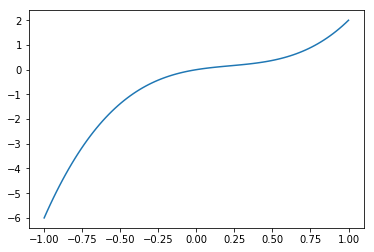

In [5]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))

Теперь зададим набор точек (10 штук) и посмотрим что будет, если подобрать по ним коэффициенты нашего многочлена:

In [6]:
x = np.linspace(-1, 1, 10)  # 10 точек на отрезке [-1, 1]
y = f(x)
coefs = scipy.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -8.42600032e-16])

(это означает многочлен $-2x^2 + 3.17037 x$)

scipy позволяет легко работать с многочленами, заданными их коэффициентами. Мы можем создать из них объект poly1d, который можно будет просто вызывать для получения нужных значений:

In [7]:
poly = scipy.poly1d(coefs)
poly(0), poly(1), poly(2)

(-8.426000324584082e-16, 1.1703703703703712, -1.6592592592592563)

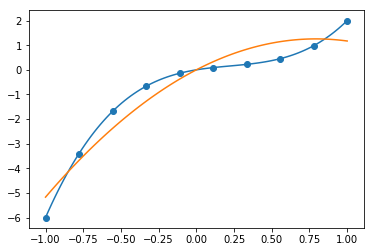

In [8]:
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Довольно ожидаемо, наша функция не очень похожа на то, что мы искали. Наверное зря мы пытаемся приблизить кубическую функцию многочленом второй степени. Давайте попробуем 3-ю степень.

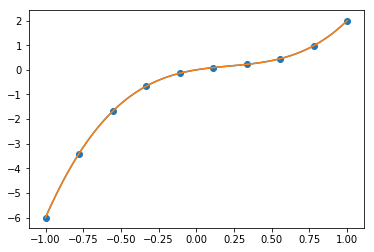

In [9]:
coefs = scipy.polyfit(x, y, deg = 3)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

На этот раз мы в точности угадали функцию. Можете проверить, что если увеличивать степень многочлена, результат не меняется: более высокие степени тут просто не нужны.

Но мы сейчас жили в идеальном мире. На практике чаще всего известные нам значения не совсем точны. Давайте добавим к значениям нашей функции немного шума:

In [10]:
x = np.linspace(-1, 1, 10)
y = f(x) + np.random.normal(0, 0.5, 10)  # случайный шум

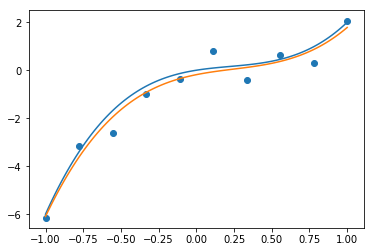

In [11]:
coefs = scipy.polyfit(x, y, deg = 3)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Теперь мы почти попали. Перед тем как читать дальше, подумайте над заданием.

**Обязательное задание 1:** попробуйте увеличить степень полинома. Что произойдет с графиком нашего приближения? Попробуйте сформулировать проблему, с которой мы столкнулись. Какие требование к нашему многочлену нам надо предъявлять, чтобы решить эту проблему?

In [12]:
# Место для решения

## 2. Переобучение

То, что вы увидели при решении этого задания называется в машинном обучении **переобучением** (overfittig).

Если мы используем достаточно сложную модель (то есть модель, у которой много параметров, в нашем случае -- многочлен достаточно высокой степени), то у модели появляется возможность "выучить" все точки, которые она видела. Например, если задано $m$ точек, всегда можно подобрать многочлен степени $m-1$, который через них проходит (если вы не знакомы с этим фактом, можете подумать, как его доказать).


"Честный" способ проверять качество нашей апроксимации -- **смотреть точность в точках, которые мы не использовали при подборе многочлена**. Это множество часто называют тестовым множеством. Давайте зададим его так:

In [13]:
# возьмем 10 случайных точек от 0 до 1
x_test = np.random.random(10) 

# превратим их в 10 случайных точек от -1 до 1
x_test = 2 * x_test - 1
x_test

array([ 0.16798208,  0.49301181, -0.07504912,  0.09517795,  0.56885685,
        0.04188809,  0.96437604,  0.51822692,  0.04453867, -0.97065983])

**Обязательное задание 2:** напишите функцию, которая для данного многочлена считает его качество на тестовом множестве (то есть среднеквадратичное отклонение между значениями функции $f$ и многочлена $P$ на тестовой выборке).

Вы все прошлое занятие изучали разные функции, попробуйте сделать MSE как можно более компактной функцией (желательно в одну строчку).

In [15]:
# y_real - это np.array c реальными значениями в точках
# y_pred - это np.array c предсказанными нами значениями в точках
# они одной длины
def MSE(y_real, y_pred):
    pass  # реализуйте функцию

**Обязательное задание 3:** нарисуйте график зависимости ошибки на тестовом множестве от степени многочлена. При какой степени ошибка минимальна?


In [ ]:
# место для решения

**(1 балл) Доп. задача 5:** как меняется график, если увеличивать количество точек в множестве, на котором мы подбираем многочлен?

In [16]:
# место для решения

## 3. Выводы

1) Цель машинного обучения с учителем - приблизить **целевую функцию** (target) по её значениям (возможно приблзительным) в некоторых точках.

В нашем случае - это $f(x) = 3x^3 - 2x^2 + x$. Обычно она, конечно, никому неизвестна.

2) Множество точек с известным значением функции называется **тренировочным множеством** (train).

В нашем случае - это 10 точек, выбранных равномерно на отрезке $[-1, 1]$.

3) Чтобы приблизить функцию, нужно использовать какую-то **модель** (model), приближающую функцию.

В данном случае - это многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$.

4) Мы выбираем **функцию потерь** (loss function) для сравнения результатов модели и реальных значения на тренировочном множестве. Чем она меньше, тем лучше наша модель.

В данном случае - это $MSE = \sum_i (P(x_i) - f(x_i))^2$.

5) У модели есть **параметры**, которые мы выбираем так, чтобы функция потерь на тренировочном множестве была минимальна.

В данном случае - это коэффициенты многочлена ($a_0, a_1, \ldots, a_n$). Выбираются они с помощью пока магической для нас функции polyfit.

6) У модели есть **гиперпараметры**, которые мы выбираем сами.

В данном случае - это степень многочлена (число $n$).

7) Однако такой подход с минимизацией функции потерь может привести к тому, что мы идеально приблизим функцию на тренировочном множестве, но она будет абсолютно отличаться во всех остальных точках. Это явление называется **переобучением**.

В данном случае - мы видели, что если степень многочлена большая (больше трех), то мы попадаем во все точки, но при этом сам многочлен сильно отличается от $f(x)$.

8) Чтобы бороться с переобучением, полезно выделить **тестовое множество** точек, в которых мы тоже знаем результаты функции. Оно никак не используется при обучении модели, и нужно только для валидации результата.

В данном случае - мы взяли рандомные 10 точек на отрезке $[-1, 1]$.

9) В идеальном случае функция потерь на тренировочном и тестовом множестве не отличается. А вот если на тренировочном функция потерь получается гораздо меньше, чем на тестовом, то это говорит о том, что происходит переобучение.

Действительно, при большой степени MSE близка к или равна нулю на тренировочном множестве, а на тестовом множестве нет.

10) Единственный пока способ, который мы знаем, чтобы влиять на переобучение - это перебирать **гиперпараметры** модели так, чтобы **минимизировать функцию потерь на тестовом множестве**.

Действительно, если выбрать степень 3, то функция потерь окажется минимальной на тестовом множестве, как мы видели в задании 3.

## 4. Разделение на тренировочную и тестовую части

Если вы решите поучаствовать в каком-нибудь соревновании по машинному обучению, вы увидите, что тестовое множество вам недоступно (иначе было бы неинтересно: очень легко обучиться предсказывать то, что ты уже видел).

В реальной жизни обычно тоже считают, что на тестовом множестве можно провериться один раз -- в самом конце. Иначе вы начнете подкручивать гиперпараметры глядя на результат на тестовой выборке и, сами того не замечая, переобучитесь.

Как поступать в такой ситуации? Придется пожертвовать частью точек, которые даны нам для обучения и использовать их для подбора гиперпараметров в нашем алгоритме (в нашем случае это степень многочлена).

То есть придется из точек, у которых мы знаем результаты, убрать, например, 10% в тестовое множество.

Функция для этого есть, например, в пакете sklearn, который можно скачать так: `conda install scikit-learn`.

In [34]:
X = np.linspace(-1, 1, 50)
y = f(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [36]:
X_train, y_train

(array([ 0.95918367, -1.        , -0.95918367, -0.26530612, -0.91836735,
        -0.2244898 ,  0.83673469, -0.87755102,  0.55102041,  0.30612245,
        -0.71428571,  0.91836735,  0.87755102, -0.79591837, -0.63265306,
         0.63265306, -0.59183673, -0.34693878,  0.46938776, -0.75510204,
        -0.51020408,  0.02040816,  0.18367347, -0.42857143,  0.79591837,
        -0.55102041,  0.42857143, -0.30612245, -0.46938776,  0.59183673,
        -0.02040816,  0.34693878, -0.10204082,  0.51020408,  0.3877551 ,
         0.06122449,  0.67346939, -0.14285714,  0.10204082,  0.71428571,
        -0.3877551 , -0.18367347,  1.        ,  0.26530612,  0.75510204]),
 array([ 1.76655985, -6.        , -5.44669313, -0.46210338, -4.92881367,
        -0.35922107,  1.1939413 , -4.44513766,  0.44568165,  0.20476162,
        -2.82798834,  1.55521934,  1.36475448, -3.5755    , -2.19281082,
         0.59181124, -1.91428741, -0.71295124,  0.33899141, -3.18709041,
        -1.42925142,  0.01960068,  0.13479078, -1

In [37]:
X_test, y_test

(array([-0.67346939, -0.06122449,  0.2244898 ,  0.14285714, -0.83673469]),
 array([-2.4969698 , -0.06940985,  0.1576384 ,  0.11078717, -3.99444109]))

## 5. Кросс-валидация

Также есть более точный способ проводить валидацию результата. Если разделить множество один раз на тестовое и тренировочное, то это может значительно влиять на результат. Вдруг в тестовое множество случайно попали такие точки, в которых предсказать значение тяжелее или легче, чем обычно?

Тогда можно применить **кросс-валидацию** - давайте разделим множество на 10 примерно равных частей, тогда у нас есть 10 разделений на тренировочное и тестовое множество - как тестовое множество выберем по очереди каждую из этих частей, а как тренировочное выберем все остальные части.

Можно посчитать результат на каждом из 10 разбиений и просто усреднить результат.


In [38]:
# Есть вот такая удобная штука
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(test_index, train_index)

[0 1 2 3 4] [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[5 6 7 8 9] [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[10 11 12 13 14] [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[20 21 22 23 24] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[25 26 27 28 29] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[30 31 32 33 34] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

**(1 балл) Доп. задача 6:** проделайте все вышеописанное с функцией $f(x) = \frac{1}{1 + e^{-x}}$ на отрезке $[-3, 3]$. Как оптимальная степень зависит от количества точек, по которым вы подбираете многочлен?

In [40]:
# место для решения

## 6. Линейная регрессия

**Регрессией** называется задача машинного обучения с учителем, в которой у нас есть много объектов с признаками, у которых надо научиться приближенно предсказывать значение целевой функции, которая равна какому-то **действительному числу**. 

В этом будет отличие задачи регрессии от задачи классификации - регрессия предсказывает число, а классификация - один из нескольких классов.

До этого мы учились приближать одномерную функцию многочленом. Каждая точка имела ровно один признак - коодинату $x$.

Тем не менее, чаще всего в машинном обучении признаков гораздо больше. Возьмем какой-нибудь реальный датасет, например, **страны мира**.

In [41]:
data = pd.read_csv('countries.csv')
data.head()

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,NaN,NaN,NaN


Давайте научимся предсказывать GDP (ВВП) страны под другим известным признакам. Предположительно, какая-то зависимость существует.

**Признаками** (по-английски feature) страны у нас теперь будут 16 чисел с признаками, а не 1 число как раньше.

In [52]:
X = np.array(data.drop(['Country', 'GDP ($ per capita)'], axis=1))
X[:5]

array([[ 3.1056997e+07,  6.4750000e+05,  4.8000000e+01,  0.0000000e+00,
         2.3060000e+01,  1.6307000e+02,  3.6000000e+01,  3.2000000e+00,
         1.2130000e+01,  2.2000000e-01,  8.7650000e+01,  4.6600000e+01,
         2.0340000e+01,  3.8000000e-01,  2.4000000e-01,  3.8000000e-01],
       [ 3.5816550e+06,  2.8748000e+04,  1.2460000e+02,  1.2600000e+00,
        -4.9300000e+00,  2.1520000e+01,  8.6500000e+01,  7.1200000e+01,
         2.1090000e+01,  4.4200000e+00,  7.4490000e+01,  1.5110000e+01,
         5.2200000e+00,  2.3200000e-01,  1.8800000e-01,  5.7900000e-01],
       [ 3.2930091e+07,  2.3817400e+06,  1.3800000e+01,  4.0000000e-02,
        -3.9000000e-01,  3.1000000e+01,  7.0000000e+01,  7.8100000e+01,
         3.2200000e+00,  2.5000000e-01,  9.6530000e+01,  1.7140000e+01,
         4.6100000e+00,  1.0100000e-01,  6.0000000e-01,  2.9800000e-01],
       [ 5.7794000e+04,  1.9900000e+02,  2.9040000e+02,  5.8290000e+01,
        -2.0710000e+01,  9.2700000e+00,  9.7000000e+01,  2.59

In [53]:
y = np.array(data['GDP ($ per capita)'])
y[:5]

array([  700.,  4500.,  6000.,  8000., 19000.])

In [65]:
country_names = data['Country']

In [84]:
# небольшая проблема: некоторые данные в признаках помечены как NaN
# надо их заменить на какое-то число, давайте заменим на 0

X[np.where(np.isnan(X))] = 0.0
X[:5]

array([[ 3.1056997e+07,  6.4750000e+05,  4.8000000e+01,  0.0000000e+00,
         2.3060000e+01,  1.6307000e+02,  3.6000000e+01,  3.2000000e+00,
         1.2130000e+01,  2.2000000e-01,  8.7650000e+01,  4.6600000e+01,
         2.0340000e+01,  3.8000000e-01,  2.4000000e-01,  3.8000000e-01],
       [ 3.5816550e+06,  2.8748000e+04,  1.2460000e+02,  1.2600000e+00,
        -4.9300000e+00,  2.1520000e+01,  8.6500000e+01,  7.1200000e+01,
         2.1090000e+01,  4.4200000e+00,  7.4490000e+01,  1.5110000e+01,
         5.2200000e+00,  2.3200000e-01,  1.8800000e-01,  5.7900000e-01],
       [ 3.2930091e+07,  2.3817400e+06,  1.3800000e+01,  4.0000000e-02,
        -3.9000000e-01,  3.1000000e+01,  7.0000000e+01,  7.8100000e+01,
         3.2200000e+00,  2.5000000e-01,  9.6530000e+01,  1.7140000e+01,
         4.6100000e+00,  1.0100000e-01,  6.0000000e-01,  2.9800000e-01],
       [ 5.7794000e+04,  1.9900000e+02,  2.9040000e+02,  5.8290000e+01,
        -2.0710000e+01,  9.2700000e+00,  9.7000000e+01,  2.59

Какую модель выбрать для предсказания ВВП? Давайте выберем **линейную модель**. То есть результат зависит от признаков как их линейная комбинация:

$$m(x_1, \ldots, x_n) = a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n$$.

Как функцию потерь опять выберем MSE - среднеквадратичную ошибку.

Такая модель уже написана в пакете $sklearn$ и называется **LinearRegession**.

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

У любой модели в библиотеке sklearn есть следующие методы:

1) fit(X_train, y_train) - обучить модель на значениях на тренировочном множестве (подобрать параметры, в которых функция потерь минимальна). Мы пока не будем рассказывать, как происходит этот подбор параметров для LinearRegression, он реализован внутри библиотеки.

2) predict(X_test) - применить модель на тестовом множестве.

In [93]:
# делим на тренировочное и тестовое множество
X_train, X_test, y_train, y_test, country_names_train, country_names_test = \
    train_test_split(X, y, country_names, test_size=0.1)

In [94]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
y_pred = model.predict(X_test)
y_pred

array([ 11908.20475328,   3771.9583193 ,  24057.07006619,  -3082.25457841,
         4982.47667702,   -406.02481758,    716.50545787,   6512.75447863,
         9775.25463153,  12047.31919325, -10780.6892859 ,  15402.26706926,
        14871.83912167,  19209.47139567,   2441.59172576,     36.41025089,
        11454.60753112,    300.54104989,  25478.09196411,  29296.77767076,
         5574.94751903,   -959.73973442,  13563.78650799])

In [96]:
y_test

array([15000.,  1100., 29800.,  8000., 19200.,  1100.,  1900.,  2500.,
        6700.,  9900.,  2600., 15700.,  8300., 10600.,  5000.,   800.,
       11200.,  1300., 25000., 26800.,  4000.,   700., 11100.])

In [106]:
# Посчитали MSE

MSE(y_test, y_pred)

In [107]:
test_data = pd.DataFrame()
test_data['Country'] = country_names_test
test_data['real GDP'] = y_test
test_data['pred GDP'] = y_pred
test_data['squared error'] = (y_test - y_pred) ** 2
test_data['error / real'] = (y_test - y_pred) / y_test
test_data

,Country,real GDP,pred GDP,squared error,error / real
148,New Caledonia,15000.0,9491.304348,3.034573e+07,0.367246
209,Tuvalu,1100.0,9491.304348,7.041399e+07,-7.628458
36,Canada,29800.0,9491.304348,4.124431e+08,0.681500
3,American Samoa,8000.0,9491.304348,2.223989e+06,-0.186413
52,Cyprus,19200.0,9491.304348,9.425877e+07,0.505661
31,Burkina Faso,1100.0,9491.304348,7.041399e+07,-7.628458
192,Sudan,1900.0,9491.304348,5.762790e+07,-3.995423
75,Georgia,2500.0,9491.304348,4.887834e+07,-2.796522
206,Turkey,6700.0,9491.304348,7.791380e+06,-0.416613
41,Chile,9900.0,9491.304348,1.670321e+05,0.041282


Итого, мы предсказали ВВП со средней квадратичной ошибкой 13 миллионов. Видно, что у многих стран мы сделали это доволно точно.

Много это или мало? Давайте сравним с каким-нибудь наивным алгоритмом - всегда предсказывать среднее значение.

In [105]:
y_pred = np.mean(y_test)
MSE(y_test, y_pred)

Ну видно, что наш алгоритм работает значительно лучше, чем наивный (у него MSE в несколько раз больше). Наивный алгоритм принято называть **бейзлайном** (baseline).

## 7. Как подбираются коэффициенты

Вы скорее всего недовольны тем, что самое главное - обучение модели, то есть подбор коэффициентов, происходит магическим образом внутри библиотеки.

Причем было аж 2 обмана - сначала непонятно как работала функция polyfit(X, y, deg), теперь непонятно как работает LinearRegression().fit(X, y). Но заметим, что на самом деле эти функции делают одно и то же! И это всего лишь один обман.

In [108]:
# Заведем функцию 4 степени

def g(x):
    return x ** 4 - x ** 3 + 4 * x -1

X = np.linspace(-1, 1, 10)
y = g(X)

In [109]:
coefs_polyfit = scipy.polyfit(X, y, deg=3)
coefs_polyfit

array([-1.        ,  1.01234568,  4.        , -1.11769547])

Заметим, что формула модели с многочленом ($P(x) = a_0 + a_1x + a_2x^2 + a_3x^3$) очень похожа на формулу для модели линейной регрессии ($m(x_1, x_2, x_3) = a_0 + a_1x_1 + a_2x_2 + a_3x_3$). А именно, это ровно она, примененная для $x, x^2$ и $x^3$. То есть мы будто просто добавили два новых признака, просто взяв квадрат и куб единственного существующего признака, и запустили обычную линейную регрессию. Именно так это и работает.

In [110]:
new_X = np.zeros((len(X), 3))
new_X[:, 0] = X
new_X[:, 1] = X ** 2
new_X[:, 2] = X ** 3
new_X

array([[-1.        ,  1.        , -1.        ],
       [-0.77777778,  0.60493827, -0.47050754],
       [-0.55555556,  0.30864198, -0.17146776],
       [-0.33333333,  0.11111111, -0.03703704],
       [-0.11111111,  0.01234568, -0.00137174],
       [ 0.11111111,  0.01234568,  0.00137174],
       [ 0.33333333,  0.11111111,  0.03703704],
       [ 0.55555556,  0.30864198,  0.17146776],
       [ 0.77777778,  0.60493827,  0.47050754],
       [ 1.        ,  1.        ,  1.        ]])

In [111]:
model = LinearRegression()
model.fit(new_X, y)
coefs_linregression = model.coef_
coefs_linregression, model.intercept_

(array([ 4.        ,  1.01234568, -1.        ]), -1.117695473251029)

Как видим, это ровно тот же самый многочлен (только коэффициенты у них записаны в разном порядке).

Осталось только узнать, как работает fit в LinearRegression. Про это можете посмотреть отдельный ноутбук с названием how_works_LinearRegression.ipynb

## 8. Регуляризация

Вернемся к приближению нашей одномерной функции многочленом.

In [112]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

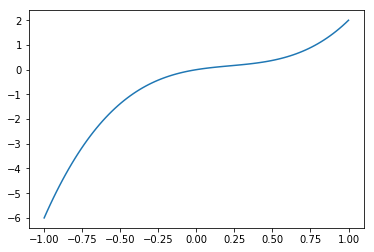

In [113]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))

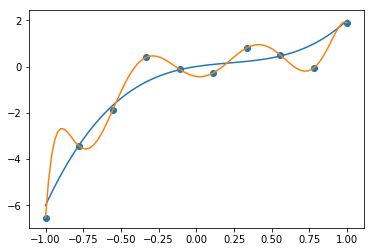

In [114]:
x = np.linspace(-1, 1, 10)
y = f(x) + np.random.normal(0, 0.5, 10)
coefs = scipy.polyfit(x, y, deg = 9)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Давайте сильно увеличим число точек в обучающей выборке

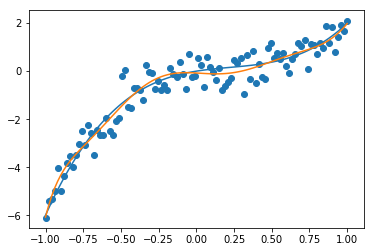

In [115]:
x = np.linspace(-1, 1, 100)
y = f(x) + np.random.normal(0, 0.5, 100)
coefs = scipy.polyfit(x, y, deg = 9)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x, f(x))
plt.plot(x, poly(x))

Выглядит, как почти точное соответствие нашей исходной функции. Но является ли это приближение хорошим? Давайте посмотрим на коэффициенты получившегося многочлена

In [116]:
coefs

array([ -2.92115788,  -5.74305467,  17.10322341,   9.88585066,
       -23.62289363,  -4.97159552,  13.81712845,  -1.14274358,
        -0.34627825,  -0.0770012 ])

Получается, что в нашем приближении коэффициент при $x^9$ равен $-2.9$, а коэффициент при $x^7$ равен $17.1$ (у вас могли получиться другие числа). Ясно, что это на самом деле очень странный многочлен, который чисто случайно почти совпадает с нашим многочленом на интересующем нас отрезке. 

**Обязательное задание 4:** постройте график аналогичный предыдущему на большем отрезке и убедитесь, что вне отрезка $[-1, 1]$ получившийся полином очень не похож на наш исходный.

Рекомендую выбрать отрезок $[-1.4, 1.4]$, чтобы на графике хоть что-то было видно.

In [117]:
# место для решения

Это общая проблема - как правило экстраполировать (обобщать знания в сторону значений, которые мы раньше не встречали) гораздо сложнее чем интерполировать (обощать данные внутри интервала, где у нас есть примеры).
<img src="https://imgs.xkcd.com/comics/extrapolating.png">

**Обязательное задание 5:** проделайте все то же самое, но не используйте точки от $[0, 0.5]$ для обучения. 

Совет: такие точеки можно сгенерировать вот так: 

In [76]:
x = np.linspace(-1, 1, 200)
x = x[(x < 0) + (x > 0.5)] # Подумайте, почему это работает

In [ ]:
# место для решения

Убедитесь, что для полинома высокой степени на пропущенном кусочке получается полная ерунда (начиная с какой степени становится плохо? От чего это зависит?)

Для того, чтобы бороться с такими проблемами - слишком сложная модель там, где хватило бы и более простой - есть трюк под названием **регуляризация**.

Мы стараемся минимизировать не только суммарную ошибку $\sum(f(x_i) - P(x_i))^2$ но и сложность модели. Что такое сложность модели можно определять по разному, но одним из хороших вариантов может быть сумма квадратов коэффициентов многочлена. Таким образом мы будем пытаться оптимизировать функцию такого вида: $$ \sum (f(x_i) -P(x_i))^2 + \alpha \sum a_i^2$$

Коэффициент $\alpha$ отвечает за то, насколько много внимания мы обращаем на сложность. К сожалению функция polyfit не умеет подбирать параметры в такой постановке, но зато есть аналог LinearRegression, который делает то же самое.

In [118]:
from sklearn.linear_model import Ridge
model = Ridge()

Этот класс реализует Ридж-регрессию, то есть подбирает коэффициенты в линейной функции с учетом регуляризации, описанной в предыдущем абзаце. При этом у каждой точки может быть сколько угодно координат. Поскольку мы хотим получить в итоге полином, для каждой точке мы сделаем координаты $x, x^2, x^3, \dots, x^n$.

In [131]:
n_dots = 100
deg = 10
model = Ridge(alpha=100)
x = np.linspace(-1, 1, n_dots)
y = f(x) + np.random.normal(0.0, 1.0, n_dots)

X = [[t ** i for i in range(1, deg+1)] for t in x]
model.fit(X, y)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [132]:
model.coef_

array([ 0.53440997, -0.12643255,  0.35935762, -0.0937239 ,  0.28168681,
       -0.06997341,  0.23610992, -0.0546722 ,  0.20547003, -0.04457504])

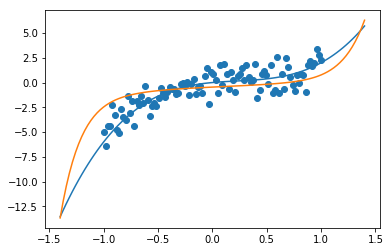

In [133]:
x100 = np.linspace(-1.4, 1.4, 100)
X100 = [[t ** i for i in range(1, deg+1)] for t in x100]
plt.scatter(x,y)
plt.plot(x100, f(x100))
plt.plot(x100, model.predict(X100))

Как видим, стало чуть лучше на выходе с границ.

**Обязательное задание 6:** разберитесь, что происходит в предыдущих блоках.

**(1 балл) Доп. задача 7:** посмотрите, удастся ли вам с помощью регуляризации исправить проблему в случае, когда есть внутренняя область в которой нет учебных данных.


In [ ]:
# место для решения

**(1 балл) Доп. задача 8**: постройте график ошибки на тесте в зависимости от значения параметра регуляризации. Попробуйте выбрать оптимальное значение этого параметра с помощью кросс-валидации.

In [ ]:
# место для решения